In [83]:
import csv
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

In [13]:
SAMPLE_RATE = 22050
labels = np.array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'])

### Load Data

In [9]:
# mfcc0 40, chroma 12, mel 7, contrast 128, tonnetz 6
# chunksize = 200
# n_chunks = 0

# X_train = np.empty((0, 386))
# y_train = np.empty((0, 1), dtype=int)

# for df in pd.read_csv('./train.csv', header=None, chunksize=chunksize):
#     n_chunks += 1
#     print 'Chunk #', n_chunks
    
#     X_train0 = df.values[:, :-1]
#     y_train0 = df.values[:, -1].reshape(-1, 1).astype(int)
    
#     mfcc = np.array([np.mean(librosa.feature.mfcc(y=x, sr=SAMPLE_RATE, n_mfcc=40).T, axis=0) for x in X_train0])
#     mfcc_std = np.array([np.std(librosa.feature.mfcc(y=x, sr=SAMPLE_RATE, n_mfcc=40).T, axis=0) for x in X_train0])
#     chroma = np.array([np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(x)), sr=SAMPLE_RATE).T, axis=0) for x in X_train0])
#     chroma_std = np.array([np.std(librosa.feature.chroma_stft(S=np.abs(librosa.stft(x)), sr=SAMPLE_RATE).T, axis=0) for x in X_train0])
#     contrast = np.array([np.mean(librosa.feature.spectral_contrast(S=np.abs(librosa.stft(x)), sr=SAMPLE_RATE).T, axis=0) for x in X_train0])
#     contrast_std = np.array([np.std(librosa.feature.spectral_contrast(S=np.abs(librosa.stft(x)), sr=SAMPLE_RATE).T, axis=0) for x in X_train0])
#     mel = np.array([np.mean(librosa.feature.melspectrogram(x, sr=SAMPLE_RATE).T, axis=0) for x in X_train0])
#     mel_std = np.array([np.std(librosa.feature.melspectrogram(x, sr=SAMPLE_RATE).T, axis=0) for x in X_train0])
#     tonnetz = np.array([np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x), sr=SAMPLE_RATE).T, axis=0) for x in X_train0])
#     tonnetz_std = np.array([np.std(librosa.feature.tonnetz(y=librosa.effects.harmonic(x), sr=SAMPLE_RATE).T, axis=0) for x in X_train0])
#     feature0 = np.hstack([mfcc, mfcc_std, chroma_std, chroma_std, mel, mel_std, contrast, contrast_std, tonnetz, tonnetz_std])
#     print mfcc.shape, chroma.shape, contrast.shape, mel.shape, tonnetz.shape, feature0.shape
    
#     X_train = np.vstack([X_train, feature0])
#     y_train =  y_train0 if n_chunks == 1 else np.vstack([y_train, y_train0])
#     print X_train.shape[0], 'samples'
    
# np.save('x_train.csv.npy', X_train)
# np.save('y_train.csv.npy', y_train)

In [8]:
# chunksize = 200
# n_chunks = 0
# outputfile = open('x_test.csv.npy', 'a')

# X_test = np.empty((0, 386))
# # mfcc0 40, chroma 12, mel 7, contrast 128, tonnetz 6
# for df in pd.read_csv('./test.csv', header=None, chunksize=chunksize):
#     n_chunks += 1
#     print 'Chunk #', n_chunks
    
#     X_test0 = df.values[:, 1:]
#     print X_test0.shape
    
#     mfcc = np.array([np.mean(librosa.feature.mfcc(y=x, sr=SAMPLE_RATE, n_mfcc=40).T, axis=0) for x in X_test0])
#     mfcc_std = np.array([np.std(librosa.feature.mfcc(y=x, sr=SAMPLE_RATE, n_mfcc=40).T, axis=0) for x in X_test0])
#     chroma = np.array([np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(x)), sr=SAMPLE_RATE).T, axis=0) for x in X_test0])
#     chroma_std = np.array([np.std(librosa.feature.chroma_stft(S=np.abs(librosa.stft(x)), sr=SAMPLE_RATE).T, axis=0) for x in X_test0])
#     contrast = np.array([np.mean(librosa.feature.spectral_contrast(S=np.abs(librosa.stft(x)), sr=SAMPLE_RATE).T, axis=0) for x in X_test0])
#     contrast_std = np.array([np.std(librosa.feature.spectral_contrast(S=np.abs(librosa.stft(x)), sr=SAMPLE_RATE).T, axis=0) for x in X_test0])
#     mel = np.array([np.mean(librosa.feature.melspectrogram(x, sr=SAMPLE_RATE).T, axis=0) for x in X_test0])
#     mel_std = np.array([np.std(librosa.feature.melspectrogram(x, sr=SAMPLE_RATE).T, axis=0) for x in X_test0])
#     tonnetz = np.array([np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x), sr=SAMPLE_RATE).T, axis=0) for x in X_test0])
#     tonnetz_std = np.array([np.std(librosa.feature.tonnetz(y=librosa.effects.harmonic(x), sr=SAMPLE_RATE).T, axis=0) for x in X_test0])
#     feature0 = np.hstack([mfcc, mfcc_std, chroma_std, chroma_std, mel, mel_std, contrast, contrast_std, tonnetz, tonnetz_std])
#     print mfcc0.shape, chroma.shape, contrast.shape, mel.shape, tonnetz.shape, feature0.shape
    
#     X_test = np.vstack([X_test, feature0])
#     print X_test.shape[0], 'samples'
    
# np.save('x_test.csv.npy', X_test)
# outputfile.close()

In [24]:
X_train = np.load('x_train.csv.npy')
y_train = np.load('y_train.csv.npy')
X_train.shape, y_train.shape

((6325L, 386L), (6325L, 1L))

In [7]:
# mfcc0 40, chroma 12, mel 7, contrast 128, tonnetz 6
X_train_mfcc = X_train[:, :40]
X_train_mfcc_std = X_train[:, 40: 80]
X_train_chroma = X_train[:, 80: 92]
X_train_chroma_std = X_train[:, 92: 104]
X_train_mel = X_train[:, 104: 111]
X_train_mel_std = X_train[:, 111: 118]
X_train_contrast = X_train[:, 118: 246]
X_train_contrast_std = X_train[:, 246: 374]
X_train_tonnetz = X_train[:, 374: 380]
X_train_tonnetz_std = X_train[:, 380: 386]

In [39]:
# mfcc0 40, chroma 12, mel 7, contrast 128, tonnetz 6
X_test_mfcc = X_test[:, :40]
X_test_mfcc_std = X_test[:, 40: 80]
X_test_chroma = X_test[:, 80: 92]
X_test_chroma_std = X_test[:, 92: 104]
X_test_mel = X_test[:, 104: 111]
X_test_mel_std = X_test[:, 111: 118]
X_test_contrast = X_test[:, 118: 246]
X_test_contrast_std = X_test[:, 246: 374]
X_test_tonnetz = X_test[:, 374: 380]
X_test_tonnetz_std = X_test[:, 380: 386]

In [20]:
y_train_one_hot = np.zeros((len(y_train), len(labels)))
y_train_flattened = y_train.flatten()
y_train_one_hot[np.arange(len(y_train_flattened)), y_train_flattened] = 1

In [10]:
X_test = np.load('x_test.csv.npy')

### Random Forest

In [62]:
X_train_tmp = X_train

In [63]:
for MAX_DEPTH in range(5, 15, 2):
    for N_ESTIMATORS in range(50, 150, 20):
        RF = RandomForestClassifier(class_weight='balanced', n_jobs=-1, max_depth=MAX_DEPTH, n_estimators=N_ESTIMATORS)
        scores = cross_val_score(RF, X_train_tmp, y_train_flattened, cv=7)
        print 'MAX_DEPTH: ', MAX_DEPTH, 'N_ESTIMATORS: ', N_ESTIMATORS, ("\tAccuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

MAX_DEPTH:  5 N_ESTIMATORS:  50 	Accuracy: 0.88253 (+/- 0.01413)
MAX_DEPTH:  5 N_ESTIMATORS:  70 	Accuracy: 0.88946 (+/- 0.01919)
MAX_DEPTH:  5 N_ESTIMATORS:  90 	Accuracy: 0.89230 (+/- 0.02274)
MAX_DEPTH:  5 N_ESTIMATORS:  110 	Accuracy: 0.89753 (+/- 0.01535)
MAX_DEPTH:  5 N_ESTIMATORS:  130 	Accuracy: 0.89594 (+/- 0.02270)
MAX_DEPTH:  7 N_ESTIMATORS:  50 	Accuracy: 0.95144 (+/- 0.01558)
MAX_DEPTH:  7 N_ESTIMATORS:  70 	Accuracy: 0.95193 (+/- 0.01233)
MAX_DEPTH:  7 N_ESTIMATORS:  90 	Accuracy: 0.94971 (+/- 0.01381)
MAX_DEPTH:  7 N_ESTIMATORS:  110 	Accuracy: 0.95666 (+/- 0.01878)
MAX_DEPTH:  7 N_ESTIMATORS:  130 	Accuracy: 0.95350 (+/- 0.00943)
MAX_DEPTH:  9 N_ESTIMATORS:  50 	Accuracy: 0.98119 (+/- 0.00732)
MAX_DEPTH:  9 N_ESTIMATORS:  70 	Accuracy: 0.98056 (+/- 0.00782)
MAX_DEPTH:  9 N_ESTIMATORS:  90 	Accuracy: 0.98261 (+/- 0.00520)
MAX_DEPTH:  9 N_ESTIMATORS:  110 	Accuracy: 0.98024 (+/- 0.00857)
MAX_DEPTH:  9 N_ESTIMATORS:  130 	Accuracy: 0.98167 (+/- 0.00711)
MAX_DEPTH:  11 N_ES

In [61]:
RF = RandomForestClassifier(class_weight='balanced', n_jobs=-1, max_depth=10, n_estimators=100)
features = [X_train_mfcc, X_train_mfcc_std, X_train_chroma, X_train_chroma_std, X_train_mel, X_train_mel_std, X_train_contrast, X_train_contrast_std, X_train_tonnetz, X_train_tonnetz_std]
feature_names = ['X_train_mfcc', 'X_train_mfcc_std', 'X_train_chroma', 'X_train_chroma_std', 'X_train_mel', 'X_train_mel_std', 'X_train_contrast', 'X_train_contrast_std', 'X_train_tonnetz', 'X_train_tonnetz_std']

for i in range(1, len(features)):
    a = itertools.combinations(range(3), i)
    X_train_tmp = np.hstack([X_train_mfcc, X_train_contrast, X_train_contrast_std])
    scores = cross_val_score(RF, features[i], y_train_flattened, cv=7)
    print 'Feature: ', feature_names[i], ("\tAccuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Feature:  X_train_mfcc 	Accuracy: 0.97596 (+/- 0.01146)
Feature:  X_train_mfcc_std 	Accuracy: 0.66037 (+/- 0.03135)
Feature:  X_train_chroma 	Accuracy: 0.65420 (+/- 0.03141)
Feature:  X_train_chroma_std 	Accuracy: 0.65562 (+/- 0.02904)
Feature:  X_train_mel 	Accuracy: 0.67538 (+/- 0.03506)
Feature:  X_train_mel_std 	Accuracy: 0.65135 (+/- 0.02813)
Feature:  X_train_contrast 	Accuracy: 0.93690 (+/- 0.02272)
Feature:  X_train_contrast_std 	Accuracy: 0.92425 (+/- 0.01627)
Feature:  X_train_tonnetz 	Accuracy: 0.73119 (+/- 0.04246)
Feature:  X_train_tonnetz_std 	Accuracy: 0.49847 (+/- 0.03154)


In [88]:
for i, j in list(itertools.combinations(range(len(features)), 2)):
    X_train_tmp = np.hstack([features[i], features[j]])
    scores = cross_val_score(RF, X_train_tmp, y_train_flattened, cv=7)
    print 'Feature: ', feature_names[i], feature_names[j], ("\tAccuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

 Feature:  X_train_mfcc X_train_mfcc_std 	Accuracy: 0.95857 (+/- 0.01397)
Feature:  X_train_mfcc X_train_chroma 	Accuracy: 0.97186 (+/- 0.01225)
Feature:  X_train_mfcc X_train_chroma_std 	Accuracy: 0.97518 (+/- 0.00965)
Feature:  X_train_mfcc X_train_mel 	Accuracy: 0.97549 (+/- 0.01343)
Feature:  X_train_mfcc X_train_mel_std 	Accuracy: 0.97280 (+/- 0.01211)
Feature:  X_train_mfcc X_train_contrast 	Accuracy: 0.98150 (+/- 0.00581)
Feature:  X_train_mfcc X_train_contrast_std 	Accuracy: 0.97028 (+/- 0.00805)
Feature:  X_train_mfcc X_train_tonnetz 	Accuracy: 0.97612 (+/- 0.00680)
Feature:  X_train_mfcc X_train_tonnetz_std 	Accuracy: 0.97358 (+/- 0.01624)
Feature:  X_train_mfcc_std X_train_chroma 	Accuracy: 0.75525 (+/- 0.02485)
Feature:  X_train_mfcc_std X_train_chroma_std 	Accuracy: 0.76047 (+/- 0.02600)
Feature:  X_train_mfcc_std X_train_mel 	Accuracy: 0.76772 (+/- 0.03961)
Feature:  X_train_mfcc_std X_train_mel_std 	Accuracy: 0.75776 (+/- 0.02666)
Feature:  X_train_mfcc_std X_train_contr

In [ ]:
for i, j, k in list(itertools.combinations(range(len(features)), 3)):
    X_train_tmp = np.hstack([features[i], features[j], features[k]])
    scores = cross_val_score(RF, X_train_tmp, y_train_flattened, cv=7)
    print 'Feature: ', feature_names[i], feature_names[j], feature_names[k], ("\tAccuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

In [64]:
X_train_tmp = np.hstack([X_train_mfcc, X_train_contrast, X_train_contrast_std])
X_test_tmp = np.hstack([X_test_mfcc, X_test_contrast, X_test_contrast_std])

In [65]:
RF = RandomForestClassifier(class_weight='balanced', n_jobs=-1, max_depth=10, n_estimators=100)

In [66]:
RF.fit(X_train_tmp, y_train)

c:\python27\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [67]:
y_hat_rf = RF.predict(X_test_tmp)

In [68]:
result = np.vstack((range(len(y_hat)), y_hat_rf)).T
df = pd.DataFrame(result)
df = df.astype(int)
df.to_csv('random_forest_result.csv', index=False, header=['Id', 'Prediction'])

### KNN



In [56]:
for i in range(1, 6):
    KNN = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs=-1)
    scores = cross_val_score(KNN, X_train_tmp, y_train_flattened)
    print 'Neighbors: ' + str(i) + ('\tAccuracy: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() * 2))

Neighbors: 1	Accuracy: 0.91303 (+/- 0.01706)
Neighbors: 2	Accuracy: 0.88678 (+/- 0.02045)
Neighbors: 3	Accuracy: 0.89453 (+/- 0.01697)
Neighbors: 4	Accuracy: 0.88489 (+/- 0.01932)
Neighbors: 5	Accuracy: 0.88331 (+/- 0.02022)


In [89]:
KNN = KNeighborsClassifier(n_neighbors=1, algorithm='brute', n_jobs=-1)

In [94]:
X_train_tmp = np.hstack([X_train_mfcc, X_train_mel])
X_test_tmp = np.hstack([X_test_mfcc, X_test_mel])

In [95]:
KNN.fit(X_train_tmp, y_train_flattened)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

In [96]:
y_hat_knn = KNN.predict(X_test_tmp)

In [97]:
result = np.vstack((range(len(y_hat)), y_hat_knn)).T
df = pd.DataFrame(result)
df = df.astype(int)
df.to_csv('knn_result.csv', index=False, header=['Id', 'Prediction'])

### KNN Classes

In [98]:
KNN = KNeighborsClassifier(n_neighbors=3, algorithm='brute', n_jobs=-1)

In [99]:
X_train_tmp = np.hstack([X_train_mfcc, X_train_mfcc_std])
X_test_tmp = np.hstack([X_test_mfcc, X_test_mfcc_std])

In [100]:
KNN.fit(X_train_tmp, y_train_flattened)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [108]:
KNN.score(X_train_tmp, y_train_flattened)

0.987193675889328

In [139]:
y_hat = KNN.predict(X_train_tmp)

<BarContainer object of 10 artists>

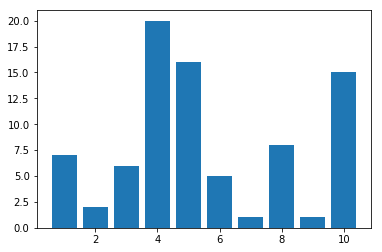

In [145]:
diff = 1 - (y_train_flattened==y_hat).astype(int)
wrong_labels = np.multiply(diff, (y_train_flattened+1))
unique, counts = np.unique(wrong_labels, return_counts=True)
wrong_label_counts = dict(zip(unique, counts))
del wrong_label_counts[0]
wrong_label_counts
plt.bar(wrong_label_counts.keys(), wrong_label_counts.values())

<BarContainer object of 10 artists>

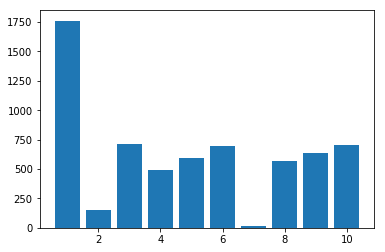

In [146]:
unique, counts = np.unique(y_train_flattened+1, return_counts=True)
label_counts = dict(zip(unique, counts))
label_counts
plt.bar(label_counts.keys(), label_counts.values())

In [147]:
KNN = KNeighborsClassifier(n_neighbors=5, algorithm='brute', n_jobs=-1)
KNN.fit(X_train_tmp, y_train_flattened)
y_hat = KNN.predict(X_train_tmp)

<BarContainer object of 10 artists>

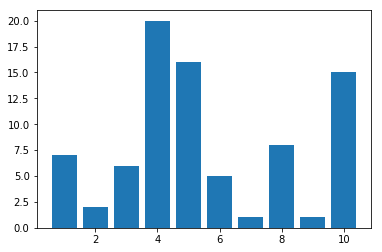

In [148]:
diff = 1 - (y_train_flattened==y_hat).astype(int)
wrong_labels = np.multiply(diff, (y_train_flattened+1))
unique, counts = np.unique(wrong_labels, return_counts=True)
wrong_label_counts = dict(zip(unique, counts))
del wrong_label_counts[0]
wrong_label_counts
plt.bar(wrong_label_counts.keys(), wrong_label_counts.values())